# Problem Set 3, due February 24 at 11:59pm.

### Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Part 1 will be relatively easy; Part 2 will take more time.

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://www.kellogg.northwestern.edu/faculty/weber/emp/_session_3/boston.htm).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [2]:
# load Boston housing data set
data = np.loadtxt('data.txt')
target = np.loadtxt('target.txt')

In [3]:
# columns_names = ['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

'''load array into pandas dataframe with data and target integrated'''
bdata_df = pd.DataFrame(data, columns = ['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
bdata_df['MEDV'] = target
# print(bdata_df.head(3))
# bdata_df.shape

## Side note: 
You can use the IPython to easily debug your code. Just add the line IPython.embed() as a break point at some place in
your code and it will give you access to a Python terminal where you can view the values that specific variables get, their dimensions etc. The pdb package in Python is also similar to IPython. 

---

## Part 1: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.
Before beginning the "real" work, refamiliarize yourself with the dataset.

### 1.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation). Do not use a built-in function (other than sqrt) to compute RMSE.



In [4]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print(compute_rmse((2,2,3),(0,2,6)))
2.08
"""
def compute_rmse(predictions, yvalues):
    rmse = np.sqrt(((predictions-yvalues)**2).mean())
    return rmse

# print(compute_rmse(np.array([2,2,3]),np.array([0,2,6])))

### 1.2 Divide your data into training and testing datasets

Randomly select 80% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 20% in a testing dataset (call this "bdata_test")


In [5]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

'''randomly select 80% indeces for train and 20% for test datasets'''
train_idx = list(np.random.choice(range(len(data)), int(len(data) * .8), replace=False))
test_idx = list(set(range(len(data))) - set(train_idx))

'''divide them into train and test datasets'''
bdata_X_train = data[train_idx]
bdata_y_train = target[train_idx]

bdata_X_test = data[test_idx]
bdata_y_test = target[test_idx]

# from sklearn.model_selection import train_test_split
# bdata_X_train, bdata_X_test, bdata_y_train, bdata_y_test = train_test_split(np.asarray(bdata_df.iloc[:,0:13]), np.asarray(bdata_df.iloc[:,13]),
#                                                     test_size=0.2, random_state=13579, shuffle=True)

### 1.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Specifically, do the following:
1. Compute the RMSE of the training set.
2. Now compute the RMSE on the test data set (but use the model you trained on the training set!).
3. How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?
4. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in blue and the test instances in red. Make sure to label your axes appropriately, and add a legend to your figure to make clear which dots are which.
5. Add code to your function to measure the running time of your algorithm. How long does it take to compute the predicted values for the test data?

In [6]:
'''1. make a baseline model and use on training datasets'''
import time
start_time = time.time()
pred_y_train = np.ones((404,1)) * np.mean(bdata_y_train)
'''compute the RMSE of the baseline model in training set'''
rmse_tr = compute_rmse(pred_y_train, bdata_y_train)
print("Time taken: {0:.2f} seconds".format(time.time() - start_time))
print('RMSE of training set is ', rmse_tr)

Time taken: 0.00 seconds
RMSE of training set is  9.207281207825492


In [7]:
'''2. use the baseline model on testing datasets'''
start_time = time.time()
pred_y_test = np.ones((102,1)) * np.mean(bdata_y_train)
'''compute the RMSE of the baseline model in testing set'''
rmse_ts = compute_rmse(pred_y_test, bdata_y_test)
print("Time taken: {0:.2f} seconds".format(time.time() - start_time))
print('RMSE of testing set is ', rmse_ts)

Time taken: 0.00 seconds
RMSE of testing set is  9.111396183724489


In [8]:
'''3. compare the two rmse'''
print('Comparison: Training RMSE is larger than testing RMSE in size', rmse_tr-rmse_ts)

Comparison: Training RMSE is larger than testing RMSE in size 0.09588502410100297


Training datasets are larger in size than the testing datasets, and our predicted values are the same for all instances, so the root-sqaure-standard-errors (deviations from the true values) are unsurprisingly larger.

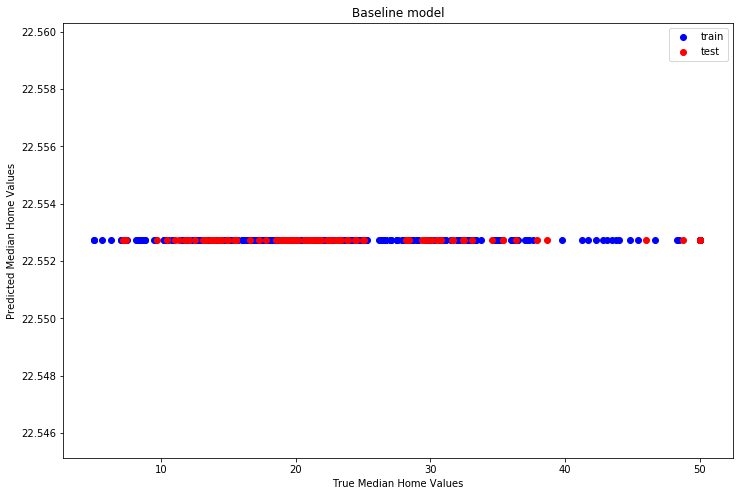

In [9]:
'''4. create a scatter plot'''
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(bdata_y_train, pred_y_train, c='b', marker='o', label='train')
plt.scatter(bdata_y_test, pred_y_test, c='r', marker='o', label='test')
plt.xlabel('True Median Home Values')
plt.ylabel('Predicted Median Home Values')
plt.title('Baseline model')
plt.legend(loc='upper right')
plt.show()

5. added code to measure running time in two cells above

It takes almost 0.00 s to run the testing sets.

### 1.4 Use local linear regression for prediction, and compute RMSE.

Create a model that predicts, for every observation of nitric oxide concentration the median home value using local linear regression
with Epanechnikov kernels (https://en.wikipedia.org/wiki/Kernel_(statistics)).
1. Create a scatter plot of the test and training data sets (use different colors for the two). Add on that plot the fit
that you get from the local linear regression.
2. Tune the smoothing parameter (the window that Epanechnikov kernels are nonegative) so that the RMSE for the test set is low. 


First create a function that implements the Epanechnikov kernel which you will need to weight the data points.

In [10]:
def epan_ker(target, data_x, gamma): # gamma is the % of nearest neighbors to the target
    '''
    Compute the epanechnikov weights. data_x denote the predictors (nitric oxide levels in our case)
    and target denotes the house median value. The gamma parameter controls the smoothing. 
    Inputs: predictors, targets and smoothing parameter gamma 
    '''
    dist = abs(data_x-target)
    dist_sorted = np.sort(dist)
    index = np.int(len(dist_sorted)*gamma) # get the index for gammar % of the distance array
    normal_value = dist_sorted[index] # find the nth number as normalized distance
    dist = dist/normal_value # array of normalized distances
    
    dist = list(dist) # coerce to a list
    weights_lst = []
    for num in dist:
        if abs(num) < 1:
            weights_lst.append(3/4 * (1-num ** 2)) # tune it with Epan Kernals
        else:
            weights_lst.append(0)
            
    weights = np.asarray(weights_lst) # coerce to an array
    
    return weights

Write the main code for local linear regression:


In [11]:
'''Converting arrays to dataframes'''
bdata_X_train_df = pd.DataFrame(bdata_X_train, columns = ['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
bdata_X_test_df = pd.DataFrame(bdata_X_test, columns = ['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
bdata_y_train_df = pd.DataFrame(bdata_y_train, columns = ['MEDV'])
bdata_y_test_df = pd.DataFrame(bdata_y_test, columns = ['MEDV'])

In [12]:
'''Run a weighted least square regression'''
import statsmodels.api as sm
import time

start_time = time.time()
train_nox = bdata_X_train_df['NOX']
train_nox = sm.add_constant(train_nox)
# print(train_nox.head())

x_plot, y_plot = [], [] # points on training sets

for i in range(len(bdata_X_train)):

    w = epan_ker(np.asarray(bdata_X_train_df['NOX'][i]), np.asarray(bdata_X_train_df['NOX']), 0.2) # get 20% nearest neighbors
    
    reg_result = sm.regression.linear_model.WLS(bdata_y_train_df, train_nox, weights = w).fit()
    
    intercept, coeff = reg_result.params[0], reg_result.params[1] # get results from regression
    
    y_plot.append(intercept + coeff * np.asarray(bdata_X_train_df['NOX'][i])) # calculate the predicted y, append to list
    x_plot.append(bdata_X_train_df['NOX'][i]) # append nox value to x_plot list

print("Time taken: {0:.2f} seconds".format(time.time() - start_time))
rmse_ll = compute_rmse(y_plot, bdata_y_train)
print('RMSE of training set with Local Linear Regression is ', rmse_ll)
#     print(reg_result.params)

/Users/qyinhelena/anaconda3/envs/APIs_geospatial/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Time taken: 0.59 seconds
RMSE of training set with Local Linear Regression is  8.605521739034717


In [13]:
'''Plot the lowess fit'''
def plot_lowess(x_train, y_train, x_test, y_test, x_plot, y_plot):
    '''
    Scatter plot of data points along with lowess fit.
    Inputs: training and test data points, lowess fitted values
    '''
    plt.figure(figsize=(14,8))
    plt.scatter(x_plot, y_plot, c='b', marker='.', label='predict')
    plt.scatter(x_test, y_test, c='r', marker='.', label='test')
    plt.scatter(x_train, y_train, c='g', marker='.', label='train')
    plt.xlabel('NOx Levels')
    plt.ylabel('Median Home Values')
    plt.legend(loc='upper right')
    plt.show()

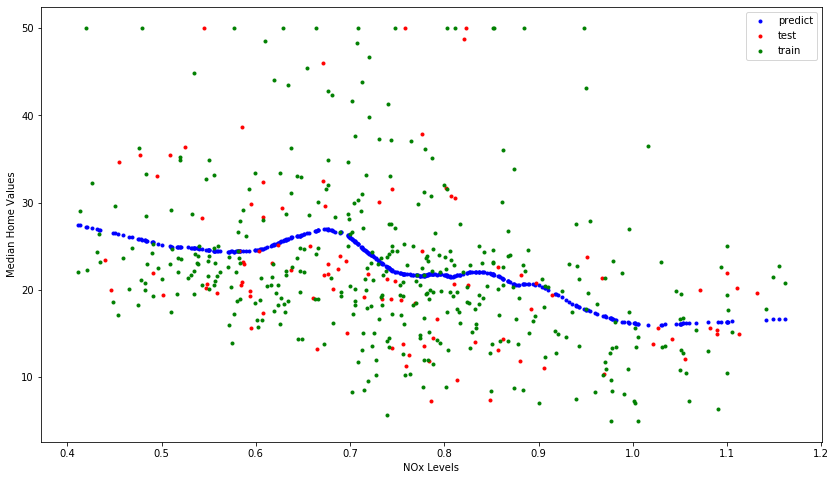

In [14]:
plot_lowess(bdata_X_train_df['NOX'], bdata_y_train, bdata_X_test_df['NOX'], bdata_y_test, x_plot, y_plot)

In [15]:
'''Store the training set x_plot and y_plot from the LL model in a dictionary'''
train_dict = dict(zip(x_plot, y_plot))
x_sorted_plot = sorted(x_plot)

'''Use the two closest points in X_train to a point in X_test to get the average of the two y_predict values to 
estimate y_test_predict'''
y_test_predict = []
for x in bdata_X_test_df['NOX']:
    
    for i in range(len(x_sorted_plot)):
        if x_sorted_plot[i] < x < x_sorted_plot[i+1]:
            avg_predict = (train_dict[x_sorted_plot[i]] + train_dict[x_sorted_plot[i+1]])/2
            y_test_predict.append(avg_predict)
            
# len(y_test_predict)

'''Compute RMSE on testing datasets'''
rmse_test_ll = compute_rmse(np.array(y_test_predict), bdata_y_test)
print('RMSE of testing set with Local Linear Regression is ', rmse_test_ll)

RMSE of testing set with Local Linear Regression is  8.592716436438378


---

## Part 2: Nearest Neighbors


### 2.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm][1] distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).
[1]: https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm

In [16]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print(distance((3,4),(6,8),2))
5

"""
def distance(x1, x2, L):
    distance = 0
    for i in range(len(x1)):
        distance += abs(x1[i]-x2[i])**L
    dist = distance**(1/L)
    return dist
print(distance((3,4),(6,8),2))

5.0


### 2.2 Basic Nearest Neighbor algorithm

Your next task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Make sure to do the following
1. Fill in the function specification below
2. Use your algorithm to predict the median home value of every instance in the test set. Report the RMSE ("test RMSE")
3. Use your algorithm to predict the median home value of every instance in the training set and report the training RMSE.
4. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in blue and the test instances in red. 
5. Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.
6. How does the performance (test RMSE and total runtime) of your nearest neighbors algorithm compare to the baseline in part 1.3?

In [17]:
"""
Function
--------
nneighbor

    Given 5 inputs （testing and training data for both predictors and target, and L-norm),
    return the predicted MEDV and RMSE

Parameters
----------
y_test_data : dataframe
    pandas dataframe of MEDV testing data for each of the observations
    
y_train_data : dataframe
    pandas dataframe of MEDV training data for each of the observations
    
x_test_data : dataframe
    pandas dataframe of selected predictors testing data for each of the observations
    
y_test_data : dataframe
    pandas dataframe of selected predictors training data for each of the observations
    
L: int
    Value of L to use in computing distances

Returns
-------
y_predict : array
    array of predicted values of MEDV
rmse: float
    measured RMSE of the predicted values and the true values
"""
import time
def nneighbor(y_test_data, y_train_data, x_test_data, x_train_data, L):
    start_time = time.time()

    X_train = np.array(x_train_data)
    y_train = np.array(y_train_data)
    
    X_test = np.array(x_test_data)
    y_true = np.array(y_test_data)
   
    y_predict = [] # store the predicted y using the nearest neighbor's y
    
    for i in range(len(X_test)):

        min_num, idx = 1000000000000000, 0 # min distance between ith instance and all other instances
        for j in range(len(X_train)):
            dist = distance(X_test[i], X_train[j], L)
            if min_num > dist:
                min_num, idx = dist, j # replace the min_num and idx of nearest neighbor j

        y_predict.append(y_train[idx]) # append the predicted y where i and j are nearest neighbors

    y_predict = np.array(y_predict)
    
    rmse = compute_rmse(y_predict, y_true)
    
    print("Time taken: {0:.2f} seconds".format(time.time() - start_time))
    return y_predict, rmse


In [18]:
'''2. Use n-neighbor algorithm for testing datasets, return testing RMSE'''
testing_y_predict, testing_rmse = nneighbor(bdata_y_test_df, 
                                            bdata_y_train_df,
                                            bdata_X_test_df.loc[:, ('CRIM', 'RM')],
                                            bdata_X_train_df.loc[:, ('CRIM', 'RM')],2)
print('The testing RMSE is', testing_rmse)

'''3. Use n-neighbor algorithm for training datasets, return training RMSE'''
training_y_predict, training_rmse = nneighbor(bdata_y_train_df,
                                              bdata_y_train_df,
                                              bdata_X_train_df.loc[:, ('CRIM', 'RM')],
                                              bdata_X_train_df.loc[:, ('CRIM', 'RM')], 2)
print('The training RMSE is', training_rmse)

Time taken: 0.13 seconds
The testing RMSE is 7.378732023492235
Time taken: 0.49 seconds
The training RMSE is 0.0


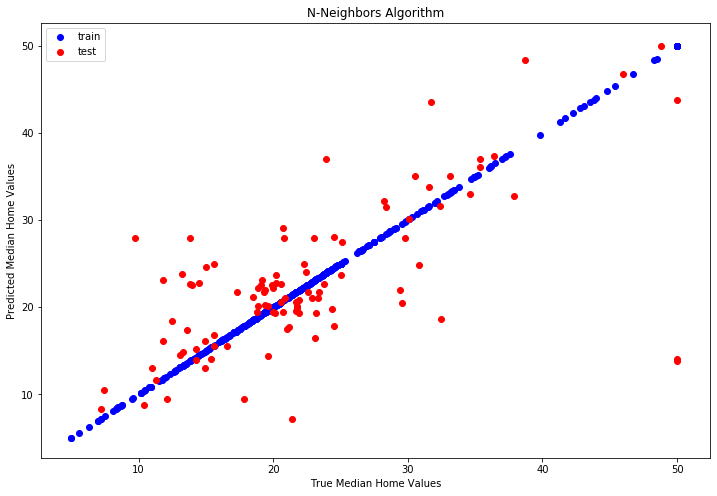

In [19]:
'''4. Scatterplot of true value of MEDV and predicted MEDV, blue for training, red for testing'''
plt.figure(figsize=(12,8))
plt.scatter(bdata_y_train, training_y_predict, c='b', marker='o', label='train')
plt.scatter(bdata_y_test, testing_y_predict, c='r', marker='o', label='test')
plt.xlabel('True Median Home Values')
plt.ylabel('Predicted Median Home Values')
plt.title('N-Neighbors Algorithm')
plt.legend(loc='upper left')
plt.show()

'''5. Estimation of time taken for predicting NN for testing datasets'''
The time taken is 0.12 seconds.

'''6. Comparing time and RMSe in 1.3 baseline model to 2.2 nearest-neighbor model'''
1.3 Baseline model:
Time taken: 0.00 seconds
RMSE of testing set is  9.111396183724489

2.2 Nearest Neighbor model:
Time taken: 0.12 seconds
The testing RMSE is 7.378732023492235

The time taken for baseline model is much shorter than the NN model, meaning the basic model is more efficient. However, the NN performs better in accuracy of predictions. 

### 2.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations. What do you observe?

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

*NOTE 2*: In this case, there might not be a major impact on RMSE; don't get confused if you find that to be the case.

In [20]:
"""
Function
--------
normalize

    given an array of raw data, use mean and standard deviation to normalize and return an array of normalizewd data

Parameters
----------
raw_data : array

    array of raw data of feature

Returns
-------
normalized_data: array

    array of normalized data of feature

"""
def normalize(raw_data):
    mean = np.mean(raw_data)
    sd = np.std(raw_data)
    normalized_data = (raw_data-mean)/sd
    
    return normalized_data

In [21]:
'''Normalize each feature in training and stack to a n-array, so that each time we just get what features we want'''
all_train_lst = []
for col in bdata_X_train_df.columns:
    all_train_lst.append(normalize(bdata_X_train_df[col]).values)
bdata_X_train_all = np.stack((all_train_lst), axis = 1) # normalized training set in array format

'''Normalize each feature in testing and stack to a n-array, so that each time we just get what features we want'''
all_test_lst = []
for col in bdata_X_train_df.columns:
    all_test_lst.append(normalize(bdata_X_test_df[col]).values)
bdata_X_test_all = np.stack((all_test_lst), axis = 1) # normalized testing set in array format

In [22]:
'''Variation 1: Select CRIM and RM as features, convert normalized array to dataframe'''
bdata_X_train1_df = pd.DataFrame(bdata_X_train_all[:,(0,5)], columns = None)
bdata_X_test1_df = pd.DataFrame(bdata_X_test_all[:,(0,5)], columns = None)

'''Run n-neighbor for normalized testing datasets, return y predict and testing RMSE'''
testing_y_predict1, testing_rmse1 = nneighbor(bdata_y_test_df, bdata_y_train_df,
                                              bdata_X_test1_df, bdata_X_train1_df, 2)
print('The CRIM, RM and L2 testing RMSE is', testing_rmse1)

'''Run n-neighbor for normalized training datasets, return y predict and training RMSE'''
training_y_predict1, training_rmse1 = nneighbor(bdata_y_train_df, bdata_y_train_df, 
                                                      bdata_X_train1_df, bdata_X_train1_df, 2)
print('The CRIM, RM and L2 training RMSE is', training_rmse1)

Time taken: 0.16 seconds
The CRIM, RM and L2 testing RMSE is 7.620721236002715
Time taken: 0.51 seconds
The CRIM, RM and L2 training RMSE is 0.0


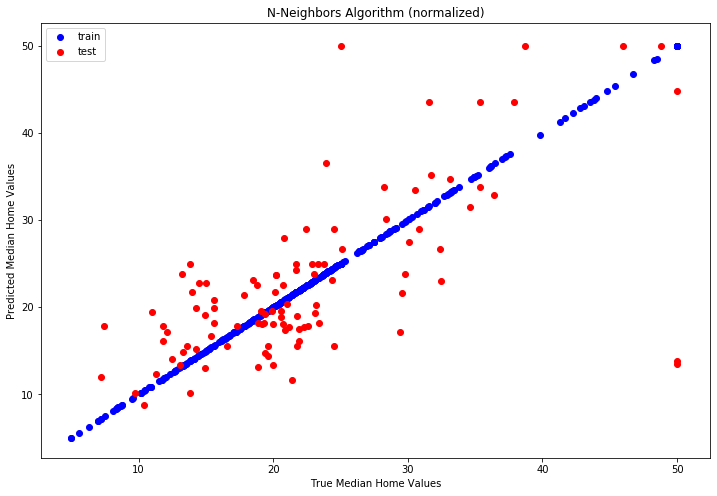

In [23]:
'''After normalization, plot scatterplot of true value of MEDV and predicted MEDV, blue for training, red for testing'''
plt.figure(figsize=(12,8))
plt.scatter(bdata_y_train, training_y_predict1, c='b', marker='o', label='train')
plt.scatter(bdata_y_test, testing_y_predict1, c='r', marker='o', label='test')
plt.xlabel('True Median Home Values')
plt.ylabel('Predicted Median Home Values')
plt.title('N-Neighbors Algorithm (normalized)')
plt.legend(loc='upper left')
plt.show()

It seems the RMSE on testing datasets are similar to not normalized situation.

### 2.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

*NOTE:* For this and all subsequent questions, you should use normalized features

Reference: columns = ['CRIM','ZN','INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']  

In [24]:
'''Variation 2: Select NOX and INDUS as features, convert normalized array to dataframe'''
bdata_X_train2_df = pd.DataFrame(bdata_X_train_all[:,(2,4)], columns = None)
bdata_X_test2_df = pd.DataFrame(bdata_X_test_all[:,(2,4)], columns = None)

'''Run n-neighbor for normalized testing datasets, return y predict and testing RMSE'''
testing_y_predict2, testing_rmse2 = nneighbor(bdata_y_test_df, bdata_y_train_df,
                                              bdata_X_test2_df, bdata_X_train2_df, 1)
print('The NOX, INDUS and L1 testing RMSE is', testing_rmse2)

'''Run n-neighbor for normalized training datasets, return y predict and training RMSE'''
training_y_predict2, training_rmse2 = nneighbor(bdata_y_train_df, bdata_y_train_df, 
                                                      bdata_X_train2_df, bdata_X_train2_df, 1)
print('The NOX, INDUS and L1 training RMSE is', training_rmse2)

Time taken: 0.16 seconds
The NOX, INDUS and L1 testing RMSE is 10.744227816485884
Time taken: 0.53 seconds
The NOX, INDUS and L1 training RMSE is 0.0


In [25]:
'''Variation 3: Select NOX, INDUS, CRIM and RM as features, convert normalized array to dataframe'''
bdata_X_train3_df = pd.DataFrame(bdata_X_train_all[:,(2,4,0,5)], columns = None)
bdata_X_test3_df = pd.DataFrame(bdata_X_test_all[:,(2,4,0,5)], columns = None)

'''Run n-neighbor for normalized testing datasets, return y predict and testing RMSE'''
testing_y_predict3, testing_rmse3 = nneighbor(bdata_y_test_df, bdata_y_train_df,
                                              bdata_X_test3_df, bdata_X_train3_df, 4)
print('The NOX, INDUS, CRIM, RM and L4 testing RMSE is', testing_rmse3)

'''Run n-neighbor for normalized training datasets, return y predict and training RMSE'''
training_y_predict3, training_rmse3 = nneighbor(bdata_y_train_df, bdata_y_train_df, 
                                                      bdata_X_train3_df, bdata_X_train3_df, 4)
print('The NOX, INDUS, CRIM, RM and L4 training RMSE is', training_rmse3)

Time taken: 0.21 seconds
The NOX, INDUS, CRIM, RM and L4 testing RMSE is 8.420586351899964
Time taken: 0.79 seconds
The NOX, INDUS, CRIM, RM and L4 training RMSE is 0.0


In [26]:
'''Variation 4: Only change L to 6, others are the same as above'''
'''Run n-neighbor for normalized testing datasets, return y predict and testing RMSE'''
testing_y_predict4, testing_rmse4 = nneighbor(bdata_y_test_df, bdata_y_train_df,
                                              bdata_X_test3_df, bdata_X_train3_df, 6)
print('The NOX, INDUS, CRIM, RM and L6 testing RMSE is', testing_rmse4)

'''Run n-neighbor for normalized training datasets, return y predict and training RMSE'''
training_y_predict4, training_rmse4 = nneighbor(bdata_y_train_df, bdata_y_train_df, 
                                                      bdata_X_train3_df, bdata_X_train3_df, 6)
print('The NOX, INDUS, CRIM, RM and L6 training RMSE is', training_rmse4)

Time taken: 0.21 seconds
The NOX, INDUS, CRIM, RM and L6 testing RMSE is 8.299515695768862
Time taken: 0.77 seconds
The NOX, INDUS, CRIM, RM and L6 training RMSE is 0.0


In [35]:
'''Variation 5: Only change L to 8, others are the same as above'''
'''Run n-neighbor for normalized testing datasets, return y predict and testing RMSE'''
testing_y_predict5, testing_rmse5 = nneighbor(bdata_y_test_df, bdata_y_train_df,
                                              bdata_X_test3_df, bdata_X_train3_df, 8)
print('The NOX, INDUS, CRIM, RM and L8 testing RMSE is', testing_rmse5)

'''Run n-neighbor for normalized training datasets, return y predict and training RMSE'''
training_y_predict5, training_rmse5 = nneighbor(bdata_y_train_df, bdata_y_train_df, 
                                                      bdata_X_train3_df, bdata_X_train3_df, 8)
print('The NOX, INDUS, CRIM, RM and L8 training RMSE is', training_rmse5)

Time taken: 0.20 seconds
The NOX, INDUS, CRIM, RM and L8 testing RMSE is 8.487389723214404
Time taken: 0.75 seconds
The NOX, INDUS, CRIM, RM and L8 training RMSE is 0.0


For variations 3 to 5, I find that with the same features, it is not necessarily that higher L always raises lower RMSE. Also, while the four features sometimes can raise lower RMSE than two features, but it is highly depends on what features we select. Like we have lower RMSE for two features (CRIM and RM) than the RMSE for two alternative features (NOX and INDUS). My takeaway is we can play around L and different features to find a better combination that raises lower RMSE. 

### 2.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  One solution to this sort of overfitting is to use cross-validation (see K-fold [cross-validation][1].  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold][2] iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations. What do you observe?
[1]: http://en.wikipedia.org/wiki/Cross-validation_(statistics)
[2]: http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [27]:
'''randomly select indeces for train and test datasets'''
np.random.seed(seed=13579)
train_idx_kf = list(np.random.choice(range(len(data)), int(len(data) * .8), replace=False))
test_idx_kf = list(set(range(len(data))) - set(train_idx))

'''divide them into train and test datasets'''
bdata_X_train_kf = data[train_idx_kf]
bdata_y_train_kf = target[train_idx_kf]

bdata_X_test_kf = data[test_idx_kf]
bdata_y_test_kf = target[test_idx_kf]

'''change to dataframes'''
bdata_X_train_kf_df = pd.DataFrame(bdata_X_train_kf, columns = ['CRIM','ZN','INDUS', 'CHAS', 'NOX',
                                                                'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                                                                'PTRATIO', 'B', 'LSTAT'])
bdata_X_test_kf_df = pd.DataFrame(bdata_X_test_kf, columns = ['CRIM','ZN','INDUS', 'CHAS', 'NOX',
                                                              'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                                                              'PTRATIO', 'B', 'LSTAT'])
bdata_y_train_kf_df = pd.DataFrame(bdata_y_train_kf, columns = ['MEDV'])
bdata_y_test_kf_df = pd.DataFrame(bdata_y_test_kf, columns = ['MEDV'])

'''normalize each feature and stack to a narray, so that each time we just get what features we want'''
all_lst = []
for col in bdata_X_train_kf_df.columns:
    all_lst.append(normalize(bdata_X_train_kf_df[col]).values)
bdata_X_train_kf_all = np.stack((all_lst), axis = 1) # normalized training set in array format

In [28]:
from statistics import mean

'''X is normalized array of predictors, y is array of MEDV, k folds for cross-validation, L for norm'''
def k_fold_cv(X, y, k, L):
    n = int(len(X)//k) # the interval of one fold
    rmse_lst = []
    for i in range(k):
        X_va = X[n*i:n*(i+1)]
        y_va = y[n*i:n*(i+1)]
        X_tr = np.concatenate((X[:n*i], X[n*(i+1):]), axis = 0)
        y_tr = np.concatenate((y[:n*i], y[n*(i+1):]), axis = 0)
    
        X_va_df = pd.DataFrame(X_va, columns = None)
        X_tr_df = pd.DataFrame(X_tr, columns = None)
        y_va_df = pd.DataFrame(y_va, columns = None)
        y_tr_df = pd.DataFrame(y_tr, columns = None)
    
        '''Run nearest neighbor for normalized  datasets, return y predict and testing RMSE'''
        va_y_predict, va_rmse = nneighbor(y_va_df, y_tr_df, X_va_df, X_tr_df, L)
        print('The RMSE for {}th fold: '.format(i+1), va_rmse)
        rmse_lst.append(va_rmse)

    avg_rmse = mean(rmse_lst)
    print('\nThe average RMSE of cross validation: ', avg_rmse)

'''call 10-fold cross validation on nearest neighbor model'''
k_fold_cv(bdata_X_train_kf_all[:,(0,5)], bdata_y_train_df, 10, 2)

Time taken: 0.04 seconds
The RMSE for 1th fold:  6.406988372082472
Time taken: 0.04 seconds
The RMSE for 2th fold:  4.833658035070334
Time taken: 0.04 seconds
The RMSE for 3th fold:  4.770089097700377
Time taken: 0.04 seconds
The RMSE for 4th fold:  8.838085199860885
Time taken: 0.04 seconds
The RMSE for 5th fold:  5.224772722329651
Time taken: 0.04 seconds
The RMSE for 6th fold:  10.909032954391511
Time taken: 0.04 seconds
The RMSE for 7th fold:  4.880061475022625
Time taken: 0.04 seconds
The RMSE for 8th fold:  5.560125897855192
Time taken: 0.04 seconds
The RMSE for 9th fold:  10.055657611514029
Time taken: 0.04 seconds
The RMSE for 10th fold:  5.224485620613765

The average RMSE of cross validation:  6.670295698644084


I find that 10-fold cross validation has on average lower RMSE than what we did before with the whole training set.

### 2.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation and L2 normalization, report the RMSE for K=3 and the running time of the algorithm.

In [29]:
"""
Function
--------
knn

    Given 5 inputs（testing and training data for both predictors and target, L-norm and K for number of nearest neighbors), 
    return the predicted MEDV and average RMSE

Parameters
----------
y_test_data : dataframe
    pandas dataframe of MEDV testing data for each of the observations
    
y_train_data : dataframe
    pandas dataframe of MEDV training data for each of the observations
    
x_test_data : dataframe
    pandas dataframe of selected predictors testing data for each of the observations
    
y_test_data : dataframe
    pandas dataframe of selected predictors training data for each of the observations
    
L: int
    Value of L to use in computing distances

K: int
    Value of K as the number of nearest neighbors to predict the MEDV of each observation

Returns
-------
y_predict : array
    array of predicted values of MEDV
rmse: float
    measured RMSE of the predicted values and the true values
    
"""
def knn(y_test_data, y_train_data, x_test_data, x_train_data, L, K):
    start_time = time.time()

    X_train = np.array(x_train_data)
    y_train = np.array(y_train_data)
    
    X_test = np.array(x_test_data)
    y_true = np.array(y_test_data)
   
    y_predict = [] # store list of the predicted y's for one datapoint
    
    for i in range(len(X_test)):
        min_lst = []
        for j in range(len(X_train)):
            dist = distance(X_test[i], X_train[j], L)
            min_lst.append((dist,j))
            min_lst.sort()
            min_lst = min_lst[0:K] # sort distance and get the K nearest neighbors
        
        total = 0
        for m in range(K):
            index = min_lst[m][1]
            total += y_train[index]
        
        y_predict.append(total/K) # append the predicted y as mean of K nearest neighbors
    
    rmse = compute_rmse(y_predict, y_true)
    
    print("Time taken: {0:.2f} seconds".format(time.time() - start_time))
    
    return y_predict, rmse

In [30]:
def knn_k_fold_cv(X, y, k, L, K):
    n = int(len(X)/k) # the length of one fold
    rmse_lst = []
    for i in range(k):
        X_va = X[n*i:n*(i+1)]
        y_va = y[n*i:n*(i+1)]
        X_tr = np.concatenate((X[:n*i], X[n*(i+1):]), axis = 0)
        y_tr = np.concatenate((y[:n*i], y[n*(i+1):]), axis = 0)
    
        X_va_df = pd.DataFrame(X_va, columns = None)
        X_tr_df = pd.DataFrame(X_tr, columns = None)
        y_va_df = pd.DataFrame(y_va, columns = None)
        y_tr_df = pd.DataFrame(y_tr, columns = None)
    
        '''Run nearest neighbor for normalized  datasets, return y predict and testing RMSE'''
        va_y_predict, va_rmse = knn(y_va_df, y_tr_df, X_va_df, X_tr_df, L, K)
        print('The RMSE for {}th fold: '.format(i+1), va_rmse)
        rmse_lst.append(va_rmse)

    avg_rmse = mean(rmse_lst)
    print('\nThe average RMSE of KNN when K = {} across {}-fold cross validation: '.format(K, k), avg_rmse, '\n')
    return avg_rmse

'''call 10-fold cross validation on K-nearest neighbor model where K = 3'''
avg_rmse_K3 = knn_k_fold_cv(bdata_X_train_kf_all[:,(0,5)], bdata_y_train_df, 10, 2, 3)

Time taken: 0.05 seconds
The RMSE for 1th fold:  4.812553030010856
Time taken: 0.05 seconds
The RMSE for 2th fold:  4.270096277863325
Time taken: 0.05 seconds
The RMSE for 3th fold:  3.7153884199516893
Time taken: 0.05 seconds
The RMSE for 4th fold:  4.68185029899742
Time taken: 0.05 seconds
The RMSE for 5th fold:  3.898030129294653
Time taken: 0.05 seconds
The RMSE for 6th fold:  8.888530374714497
Time taken: 0.05 seconds
The RMSE for 7th fold:  4.340615675735926
Time taken: 0.05 seconds
The RMSE for 8th fold:  4.526809030652829
Time taken: 0.05 seconds
The RMSE for 9th fold:  8.981736097956416
Time taken: 0.05 seconds
The RMSE for 10th fold:  4.144377047411482

The average RMSE of KNN when K = 3 across 10-fold cross validation:  5.225998638258909 



### 2.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

Reference: columns = ['CRIM','ZN','INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']                                     

In [31]:
'''find the best choice of K by iterating from 1 to 25 using 10-fold cross-validation, 
choose the K with lowest average RMSE'''
'''Note that bdata_X_train_kf_all is normalized for each features and stacked together'''
avg_rmse_K1toK25 = []
for K in range(1,26):
    avg_rmse_K1toK25.append(knn_k_fold_cv(bdata_X_train_kf_all[:, (0,1,5,6,7,9)], bdata_y_train_df, 10, 2, K))

Time taken: 0.11 seconds
The RMSE for 1th fold:  4.197797041306309
Time taken: 0.10 seconds
The RMSE for 2th fold:  4.346492839060016
Time taken: 0.10 seconds
The RMSE for 3th fold:  5.144487340833876
Time taken: 0.10 seconds
The RMSE for 4th fold:  4.463574800538241
Time taken: 0.10 seconds
The RMSE for 5th fold:  4.202112563937334
Time taken: 0.10 seconds
The RMSE for 6th fold:  8.827797007181351
Time taken: 0.10 seconds
The RMSE for 7th fold:  3.278109211115457
Time taken: 0.10 seconds
The RMSE for 8th fold:  4.917799304567033
Time taken: 0.10 seconds
The RMSE for 9th fold:  9.388077545482888
Time taken: 0.10 seconds
The RMSE for 10th fold:  4.104509714935512

The average RMSE of KNN when K = 1 across 10-fold cross validation:  5.287075736895802 

Time taken: 0.10 seconds
The RMSE for 1th fold:  3.5765730804780156
Time taken: 0.13 seconds
The RMSE for 2th fold:  4.362804430638623
Time taken: 0.12 seconds
The RMSE for 3th fold:  4.372613634887033
Time taken: 0.10 seconds
The RMSE for

Time taken: 0.21 seconds
The RMSE for 10th fold:  3.3385105799685557

The average RMSE of KNN when K = 11 across 10-fold cross validation:  4.76047510114272 

Time taken: 0.12 seconds
The RMSE for 1th fold:  4.728616524535598
Time taken: 0.12 seconds
The RMSE for 2th fold:  3.4276687696515316
Time taken: 0.12 seconds
The RMSE for 3th fold:  3.506198628064936
Time taken: 0.12 seconds
The RMSE for 4th fold:  4.1936913185164215
Time taken: 0.12 seconds
The RMSE for 5th fold:  3.4094125227082746
Time taken: 0.14 seconds
The RMSE for 6th fold:  8.104663116756372
Time taken: 0.12 seconds
The RMSE for 7th fold:  3.004966086423533
Time taken: 0.11 seconds
The RMSE for 8th fold:  3.7355153128822507
Time taken: 0.11 seconds
The RMSE for 9th fold:  10.504066507521953
Time taken: 0.11 seconds
The RMSE for 10th fold:  3.2594272993034283

The average RMSE of KNN when K = 12 across 10-fold cross validation:  4.7874226086364295 

Time taken: 0.11 seconds
The RMSE for 1th fold:  4.709464221590167
Time 

Time taken: 0.12 seconds
The RMSE for 7th fold:  3.449741651004852
Time taken: 0.12 seconds
The RMSE for 8th fold:  4.005044920353526
Time taken: 0.12 seconds
The RMSE for 9th fold:  10.92263952694298
Time taken: 0.11 seconds
The RMSE for 10th fold:  3.3018765012871185

The average RMSE of KNN when K = 22 across 10-fold cross validation:  5.065461165104562 

Time taken: 0.12 seconds
The RMSE for 1th fold:  5.418957176515364
Time taken: 0.12 seconds
The RMSE for 2th fold:  3.631714627309737
Time taken: 0.12 seconds
The RMSE for 3th fold:  3.964576130450755
Time taken: 0.12 seconds
The RMSE for 4th fold:  4.51219472415957
Time taken: 0.12 seconds
The RMSE for 5th fold:  3.9164680666644354
Time taken: 0.12 seconds
The RMSE for 6th fold:  7.522971280079925
Time taken: 0.12 seconds
The RMSE for 7th fold:  3.484381164324402
Time taken: 0.12 seconds
The RMSE for 8th fold:  4.06979479564252
Time taken: 0.12 seconds
The RMSE for 9th fold:  10.929392850100763
Time taken: 0.12 seconds
The RMSE fo

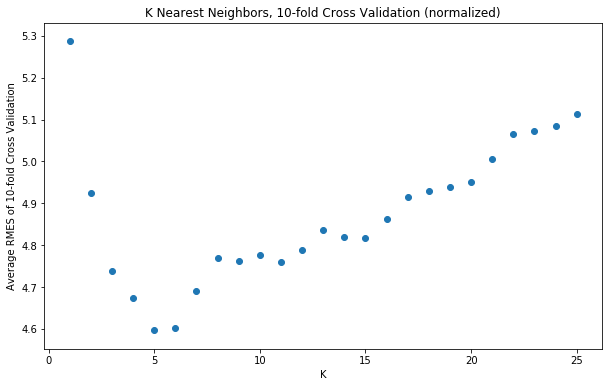

In [32]:
'''scatter plot of how average RMSE changes with K'''
plt.figure(figsize = (10,6))
plt.scatter(range(1,26), avg_rmse_K1toK25, marker = 'o')
plt.xlabel('K')
plt.ylabel('Average RMES of 10-fold Cross Validation')
plt.title('K Nearest Neighbors, 10-fold Cross Validation (normalized)')
plt.show()

From the above, we find K=5 when we have the lowest average RMSE through cross validation. Since the interval of each of the 10 folds is around 40 observatoins, and we get the 5 nearest neighbors to predict MEDV which minimizes the error (RMSE = 4.597 when K=5). I think it looks reasonable to me.

### Extra-Credit: Forward selection

Thus far the choice of predictor variables has been rather arbitrary. For extra credit, implement a basic [forward selection](http://www.stat.ubc.ca/~rollin/teach/643w04/lec/node41.html) algorithm to progressively include features that decrease the cross-validated RMSE of the model. Note that the optimal value of K may be different for each model, so you may want to use cross-validation to choose K each time (but it is also fine if you fix K at the optimal value from 2.7).  Create a graph that shows RMSE as a function of the number of features in the model. Label each point on the x-axis with the name of the feature that is added at that step in the forward selection algorithm. *(For instance, if the optimal single-feature model has CRIM with RMSE = 10, and the optimal two-feature model has CRIM+ZN with RMSE=9, the first x-axis label will say CRIM and the second x-axis lable with say ZN)*